# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [124]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import os

# File Path
colab_path = '/content/drive/MyDrive/0150 Final Project/'
file_path = 'datasets'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir(colab_path + file_path)

Mounted at /content/drive


## Step 0 | Imports and Setup

In [125]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('ai_cleaned.csv')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [126]:
# Data operations here
# drop any rows that have blank values in the parameters column
validparameters = data.dropna(subset=['parameters'])
# drop any rows that have blank values in the pflops column
validpflops = data.dropna(subset=['pflops'])

#did same functions in excel to clean up the data.

In [127]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [128]:
# Exploratory Data Analysis here
data.head()

,Entity,Code,Day,parameters,Researcher affiliation,pflops,Domain
0,(ensemble): AWD-LSTM-DOC (fin) × 5 (WT2),NaN,8/30/2018,185000000.0,Academia and industry collaboration,6.660001e+02,Language
1,4 layer QRNN (h=2500),NaN,3/22/2018,151000000.0,Industry,5.915882e+02,Language
2,ACF-WIDER,NaN,7/15/2014,6144.0,Academia,7.638001e-02,Vision
3,ADALINE,NaN,6/30/1960,17.0,Academia,6.600000e-12,Vision
4,ADAM (CIFAR-10),NaN,12/22/2014,2370000.0,Academia and industry collaboration,6.249799e-01,Vision


## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

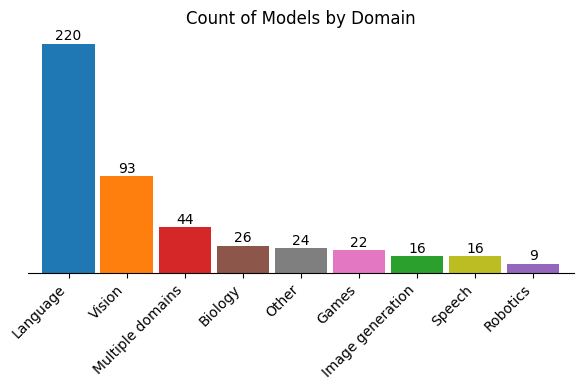

In [155]:
#count how many of each domain type
domain_counts = data['Domain'].value_counts()

# Get the existing domain_color_map from the other plot (assuming it's in scope)
# If domain_color_map is not defined, you'd need to recreate it here, e.g:
# all_unique_domains = data['Domain'].unique()
# palette_colors = sns.color_palette().as_hex()
# domain_color_map = {domain: palette_colors[i % len(palette_colors)] for i, domain in enumerate(all_unique_domains)}

# Create a list of colors for the bars based on domain_counts index and domain_color_map
bar_colors = [domain_color_map.get(domain, '#808080') for domain in domain_counts.index] # Use a default grey if a domain is missing

#create a bar graph of the domain counts, increasing the width to decrease space between bars and making the figure more compact
ax = domain_counts.plot(kind='bar', figsize=(6, 4), color=bar_colors, width=0.9)

# Add the value labels above each bar
for i, v in enumerate(domain_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Remove numbers from the Y-axis
ax.set_yticks([])
ax.set_ylabel('') # Also remove the y-axis label for cleanliness



plt.title('Count of Models by Domain')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Null Hypothesis:
1.5 Question: Which model domain between
2. Workload = B0 + B1*Parameters + B2*Domain



                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.1181      5.184     -1.180      0.238     -16.278       4.042
Domain[T.Games]                       -12.5585      6.320     -1.987      0.047     -24.945      -0.172
Domain[T.Image generation]              8.0307     12.077      0.665      0.506     -15.640      31.701
Domain[T.Language]                    -13.0809      5.525     -2.368      0.018     -23.909      -2.253
Domain[T.Multiple domains]             12.9986     13.406      0.970      0.332     -13.278      39.275
Domain[T.Other]                       -20.3458      5.885     -3.457      0.001     -31.880      -8.812
Domain[T.Robotics]                    -28.8710      7.014     -4.116      0.000     -42.618     -15.124
Domain[T.Speech]                      -26.3001      5.422     -4

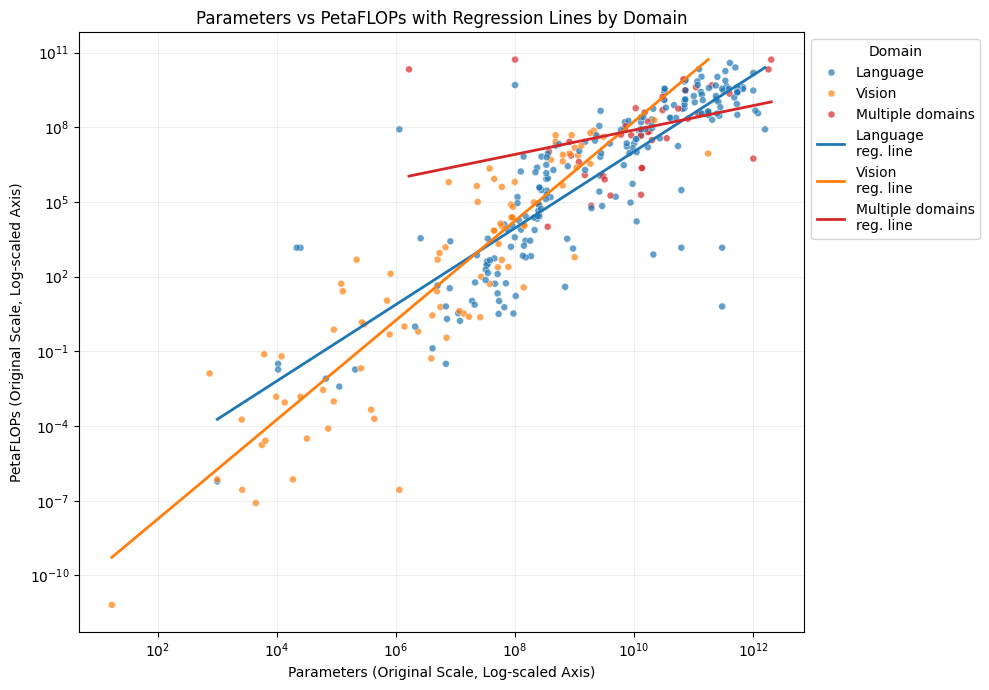

In [130]:
# Build and run your model here

pfloplog = np.log(data['pflops'])
paramlog = np.log(data['parameters'])

# Add the log-transformed columns to the DataFrame for model prediction
data['pfloplog'] = pfloplog
data['paramlog'] = paramlog

# Fit the OLS model (using robust standard errors as previously discussed for heteroskedasticity)
modellog = smf.ols('pfloplog ~ paramlog + Domain + paramlog:Domain', data=data).fit(cov_type='HC3')
print(modellog.summary().tables[1])

# --- Start of Combined Scatterplot with Regression Lines and Custom Opacity ---

# Create a new figure and axes for the combined plot
plt.figure(figsize=(10, 7))
ax = plt.gca() # Get the current axes

# Get all unique domains to create a consistent color map
all_unique_domains = data['Domain'].unique()

# Get the default color palette used by seaborn's scatterplot to match line colors
palette_colors = sns.color_palette().as_hex()
domain_color_map = {domain: palette_colors[i % len(palette_colors)] for i, domain in enumerate(all_unique_domains)}



# Define the specific domains for which to increase opacity
domains_for_higher_opacity = ['Language', 'Vision', 'Multiple domains']

# 1. Plot the SELECTED scatter points again with a HIGHER opacity on top
# Filter the data for the desired domains
high_opacity_data = data[data['Domain'].isin(domains_for_higher_opacity)]
sns.scatterplot(x='parameters', y='pflops', hue='Domain', data=high_opacity_data, s=25, alpha=0.7, ax=ax, palette=domain_color_map)

# 2. Plot Lower opacity domains
domains_for_lower_opacity = ['Image generation', 'Robotics', 'Biology', 'Games', 'Other', 'Speech']
low_opacity_data = data[data['Domain'].isin(domains_for_lower_opacity)]
#sns.scatterplot(x='parameters', y='pflops', hue='Domain', data=low_opacity_data, s=25, alpha=0.25, ax=ax, palette=domain_color_map)

# Apply log scale to the axes
ax.set_xscale('log')
ax.set_yscale('log')

# Generate predictions for all data points using the fitted model
data['predicted_pfloplog'] = modellog.predict(data)

# Define the specific domains for which to plot regression lines
selected_domains_for_lines = ['Language', 'Vision', 'Multiple domains']

# 3. Overlay regression lines for *selected* domains
for domain in selected_domains_for_lines:
    # Filter data for the current domain and sort by paramlog to ensure a smooth line
    domain_subset = data[data['Domain'] == domain].sort_values('paramlog')

    # Plot the regression line
    # Use np.exp to transform back from log-log space to original scale for plotting on log-scaled axes
    ax.plot(np.exp(domain_subset['paramlog']), np.exp(domain_subset['predicted_pfloplog']),
            label=f'{domain}\nreg. line', color=domain_color_map.get(domain), linewidth=2)


# Set labels and title
ax.set_xlabel('Parameters (Original Scale, Log-scaled Axis)')
ax.set_ylabel('PetaFLOPs (Original Scale, Log-scaled Axis)')
ax.set_title('Parameters vs PetaFLOPs with Regression Lines by Domain')

# Adjust legend to include both scatter and line labels
# Seaborn's scatterplot automatically creates a legend for 'hue'.
# ax.plot also adds labels. A single legend call will try to combine them.
ax.legend(title='Domain', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, which="both", ls="-", alpha=0.2) # Add grid for better readability on log scale
plt.tight_layout() # Adjust layout to prevent legend from overlapping
plt.show()

# --- End of Combined Scatterplot with Regression Lines and Custom Opacity ---

                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.1181      5.184     -1.180      0.238     -16.278       4.042
Domain[T.Games]                       -12.5585      6.320     -1.987      0.047     -24.945      -0.172
Domain[T.Image generation]              8.0307     12.077      0.665      0.506     -15.640      31.701
Domain[T.Language]                    -13.0809      5.525     -2.368      0.018     -23.909      -2.253
Domain[T.Multiple domains]             12.9986     13.406      0.970      0.332     -13.278      39.275
Domain[T.Other]                       -20.3458      5.885     -3.457      0.001     -31.880      -8.812
Domain[T.Robotics]                    -28.8710      7.014     -4.116      0.000     -42.618     -15.124
Domain[T.Speech]                      -26.3001      5.422     -4

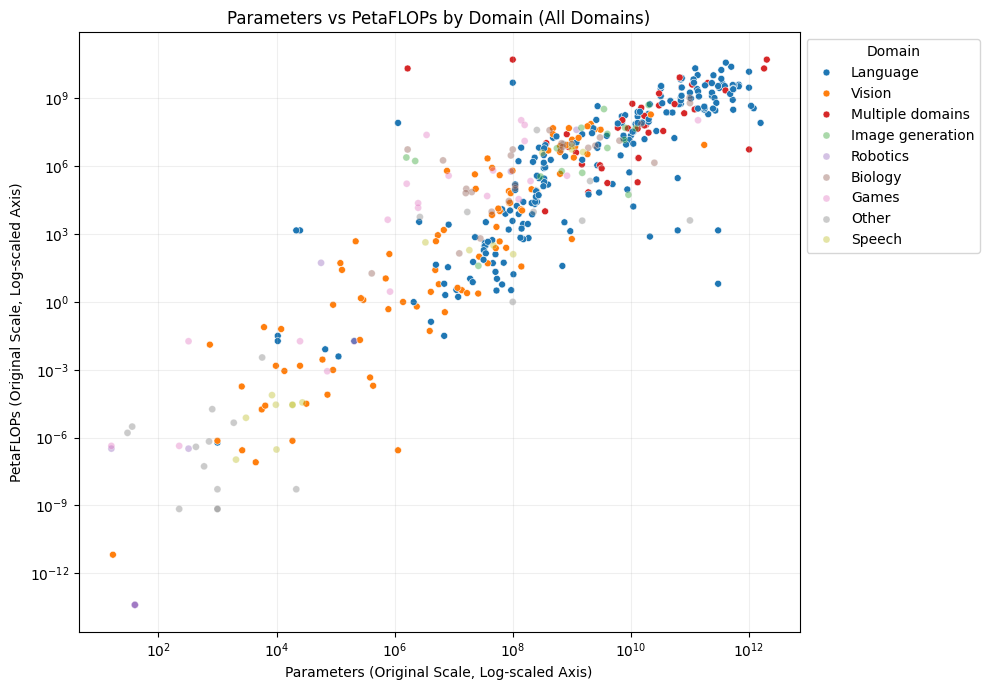

In [131]:
# Build and run your model here

pfloplog = np.log(data['pflops'])
paramlog = np.log(data['parameters'])

# Add the log-transformed columns to the DataFrame for model prediction
data['pfloplog'] = pfloplog
data['paramlog'] = paramlog

# Fit the OLS model (using robust standard errors as previously discussed for heteroskedasticity)
modellog = smf.ols('pfloplog ~ paramlog + Domain + paramlog:Domain', data=data).fit(cov_type='HC3')
print(modellog.summary().tables[1])

# --- Start of Combined Scatterplot with Regression Lines and Custom Opacity ---

# Create a new figure and axes for the combined plot
plt.figure(figsize=(10, 7))
ax = plt.gca() # Get the current axes

# Get all unique domains to create a consistent color map
all_unique_domains = data['Domain'].unique()

# Get the default color palette used by seaborn's scatterplot to match line colors
palette_colors = sns.color_palette().as_hex()
domain_color_map = {domain: palette_colors[i % len(palette_colors)] for i, domain in enumerate(all_unique_domains)}


# Define the specific domains for which to increase opacity
domains_for_higher_opacity = ['Language', 'Vision', 'Multiple domains']

# 1. Plot the SELECTED scatter points again with a HIGHER opacity on top
# Filter the data for the desired domains
high_opacity_data = data[data['Domain'].isin(domains_for_higher_opacity)]
sns.scatterplot(x='parameters', y='pflops', hue='Domain', data=high_opacity_data, s=25, alpha=1, ax=ax, palette=domain_color_map)

# 2. Plot Lower opacity domains
domains_for_lower_opacity = ['Image generation', 'Robotics', 'Biology', 'Games', 'Other', 'Speech']
low_opacity_data = data[data['Domain'].isin(domains_for_lower_opacity)]
sns.scatterplot(x='parameters', y='pflops', hue='Domain', data=low_opacity_data, s=25, alpha=0.4, ax=ax, palette=domain_color_map)



# Apply log scale to the axes
ax.set_xscale('log')
ax.set_yscale('log')

# Generate predictions for all data points using the fitted model
data['predicted_pfloplog'] = modellog.predict(data)


# Set labels and title
ax.set_xlabel('Parameters (Original Scale, Log-scaled Axis)')
ax.set_ylabel('PetaFLOPs (Original Scale, Log-scaled Axis)')
ax.set_title('Parameters vs PetaFLOPs by Domain (All Domains)')

# Adjust legend to include both scatter and line labels
# Seaborn's scatterplot automatically creates a legend for 'hue'.
# ax.plot also adds labels. A single legend call will try to combine them.
ax.legend(title='Domain', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, which="both", ls="-", alpha=0.2) # Add grid for better readability on log scale
plt.tight_layout() # Adjust layout to prevent legend from overlapping
plt.show()

# --- End of Combined Scatterplot with Regression Lines and Custom Opacity ---

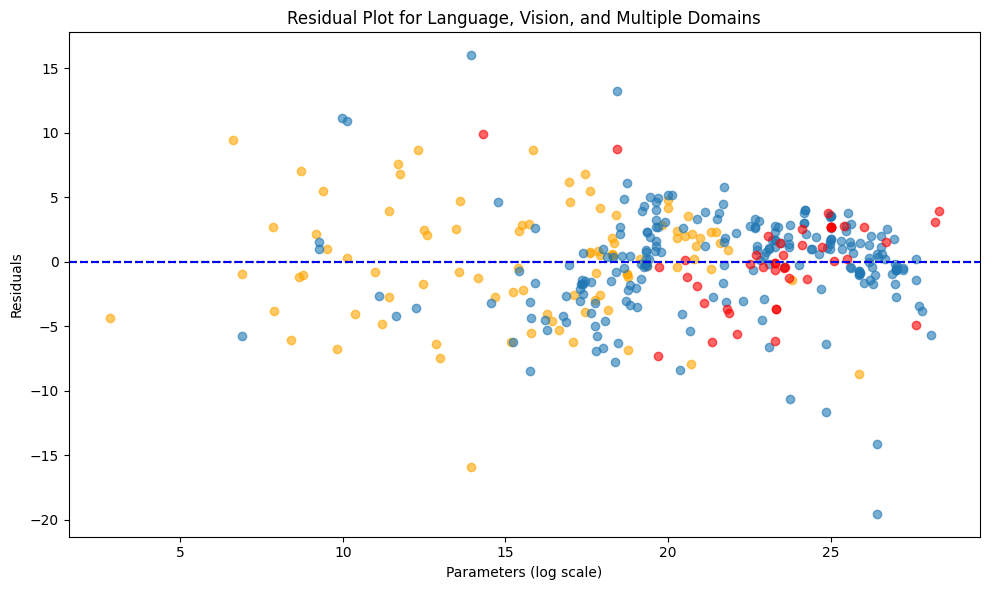

In [132]:
# Filter data for the 'Vision' domain
vision_data = data[data['Domain'] == 'Vision']
language_data = data[data['Domain'] == 'Language']
multiple_data = data[data['Domain'] == 'Multiple domains']

# Create a residual plot for the 'Vision' domain
plt.figure(figsize=(10, 6))
sns.residplot(x='paramlog', y='pfloplog', data=vision_data, color='orange', scatter_kws={'alpha': 0.6})
sns.residplot(x='paramlog', y='pfloplog', data=language_data, scatter_kws={'alpha': 0.6})
sns.residplot(x='paramlog', y='pfloplog', data=multiple_data, color='red', scatter_kws={'alpha': 0.6})

plt.axhline(y=0, color='blue', linestyle='--') # Add a horizontal line at y=0 for reference and change color to orange



plt.title('Residual Plot for Language, Vision, and Multiple Domains')
plt.xlabel('Parameters (log scale)')
plt.ylabel('Residuals')
#plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()


NOTES

-Use fixed effects (5.1) of domains to differentiate different computation amounts of different model parameters

-Use log-log regression and look up online how to interpret the coefficients of this model.

Research Question: Does computational power required by AI models vary by domain?
Data Source: Epoch AI, with processing by Our World In Data, 2 datasets combined
Methods: Regression analysis by domain, slope coefficient calculations, graph visualizations
Main Finding: Vision AI models require the most computation as parameters scale, increasing by ___% per 1% increase in parameters.